In [89]:
% pylab inline
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pylab as pb
from matplotlib import cm
from scipy.stats import norm
from scipy.special import gamma
from scipy.stats import chi

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# BAYESIAN ESTIMATION

## Example with coin toss

creating the prior

[ 0.          0.04166667  0.08333333  0.125       0.16666667  0.20833333
  0.25        0.29166667  0.33333333  0.375       0.41666667  0.45833333
  0.5         0.54166667  0.58333333  0.625       0.66666667  0.70833333
  0.75        0.79166667  0.83333333  0.875       0.91666667  0.95833333
  1.        ]
[ 0.    0.    0.    0.    0.    0.    0.25  0.    0.    0.    0.    0.    0.5
  0.    0.    0.    0.    0.    0.25  0.    0.    0.    0.    0.    0.  ]


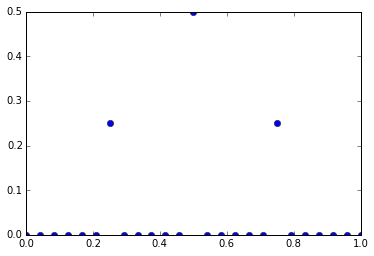

In [18]:
theta = np.linspace(0.0,1.0,25)
print theta
prior = np.zeros(theta.shape[0])
prior[6] = 0.25
prior[12] = 0.5
prior[18] = 0.25
print prior
pb.plot(theta, prior, 'bo')

computing the likelihood

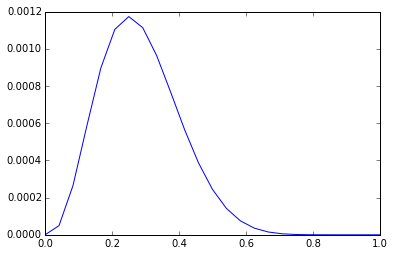

In [21]:
likelihood = np.multiply(np.power(theta, 3),np.power(1.0 - theta, 9))
pb.plot(theta, likelihood)

Computing the posterior

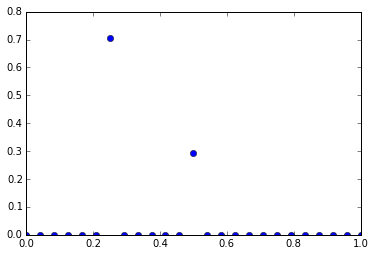

In [29]:
posterior = np.multiply(likelihood, prior)
normalizer = np.sum(posterior)
posterior = posterior*(1.0/normalizer)
pb.plot(theta, posterior, 'bo')

## Example of computing the posterior with a Gaussian model

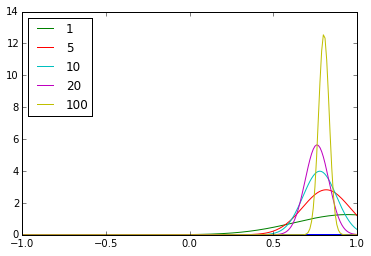

In [71]:

mean = 0.8
var = 0.1
N = 100
X = np.random.normal(mean, np.sqrt(var), N)
X_eval = np.linspace(-1.0,1.0,200)
mean_prior = 0.0
var_prior = 10.0
n_dat = [1,5,10,20,100]
Y = norm.pdf(X_eval, mean_prior, var_prior)
pb.plot(X_eval,Y)
for n in n_dat:
    mean_ml = (1.0/n)*np.sum(X[0:n])
    posterior_mean = ((var/(n*var_prior + var))*mean_prior) + (n*var_prior/(n*var_prior + var))*mean_ml
    posterior_var = (var_prior*var)/(n*var_prior + var)
    y = norm.pdf(X_eval, posterior_mean, np.sqrt(posterior_var))
    mlabel = str(n)
    pb.plot(X_eval, y, label=mlabel)
    pb.legend(loc='upper left')

## Example of computing a posterior using a normal Gamma prior over the mean and precision of a Gaussian

The idea here is to estimate the parameters of gaussian distribution(mean, precision or variance) using a normal Gamma as the prior over the precision and a Gaussian for the Mean. The posterior is gaussian also.

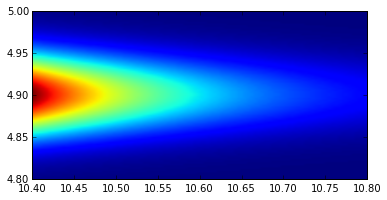

In [87]:
mean_prior = 0.0
beta_prior = 1.0
a_n = 0.1
b_n = 1.0
m = 100
m_lambda = np.linspace(9.0, 11.0, m) # Poner mas pequeño para aumentar la varianza
m_mean = np.linspace(-1.0,1.0,m)
z = np.zeros((m,m))
i = 0
for t_lambda in m_lambda:
    j = 0
    mgamma = gamma(a_n)
    result_gamma = (1.0/mgamma)*(b_n**a_n)*(t_lambda**(a_n-1.0))*np.exp(-1.0*b_n*t_lambda)
    for t_mean in m_mean:
        y = norm.pdf(t_mean, mean_prior, np.sqrt(1.0/(beta_prior*t_lambda)))
        z[j][i] = y*result_gamma
        j+=1
    i+=1
pb.imshow(z, extent=[10.4,10.8,4.8,5.0])

In [85]:
mean = 0.1
precision = 10.0
var = 1.0/precision
N = 100
X = np.random.normal(mean, np.sqrt(var), N)
mean_ml = np.sum(X)/N
mean_posterior = (beta_prior*mean_prior + N*mean_ml)/(beta_prior + N)
beta_posterior = beta_prior + N
a_n = a_n + N/2.0
b_n = b_n + (0.5*(np.dot(X - mean_ml, X - mean_ml))) + ((beta_prior*N*(mean_ml - mean_prior)*(mean_ml - mean_prior))/2.0*(beta_prior + N))

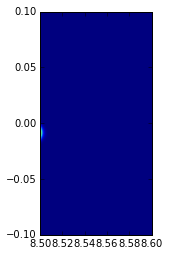

In [86]:
m = 100
m_lambda = np.linspace(9.0, 11.0, m)
m_mean = np.linspace(-1.0,1.0,m)
z = np.zeros((m,m))
i = 0
for t_lambda in m_lambda:
    j = 0
    mgamma = gamma(a_n)
    result_gamma = (1.0/mgamma)*(b_n**a_n)*(t_lambda**(a_n-1.0))*np.exp(-1.0*b_n*t_lambda)
    for t_mean in m_mean:
        y = norm.pdf(t_mean, mean_posterior, np.sqrt(1.0/(beta_posterior*t_lambda)))
        z[j][i] = y*result_gamma
        j+=1
    i+=1
pb.imshow(z, extent=[8.5,8.6,-0.1,0.1])

## Laplace approximation

Chi distribution

2.3825231417e-05


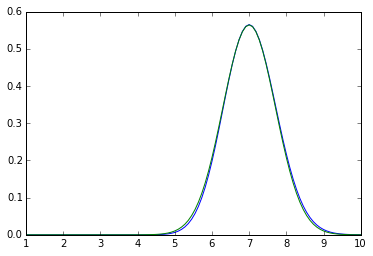

In [111]:
N = 100
z = np.linspace(1.0,10.0,N)
k = 50.0
p_z = chi.pdf(z, k)
pb.plot(z, p_z)
mean_estim = np.sqrt(k - 1.0)
var = 0.5
y = norm.pdf(z, mean_estim, np.sqrt(var))
pb.plot(z,y)
diff = np.dot((p_z - y), (p_z - y))
mse = diff/(N)
print mse

## Bayesian logistic regresion